In [1]:
#from tmseegpy.validate_tep import plot_tep_analysis

import mne
import matplotlib.pyplot as plt

fname = '/Users/alexe/Kaggle/TMSEEGNeo/Test_Neo_2/Test_Neo_2_stim/TMSEEG/out/2025-02-03T162314_phase_2_preproc-epo.fif'

epochs = mne.read_epochs(fname)

epochs = epochs.crop(-0.1, 0.3)

subject = '2025-02-03T162314'


Reading /Users/alexe/Kaggle/TMSEEGNeo/Test_Neo_2/Test_Neo_2_stim/TMSEEG/out/2025-02-03T162314_phase_2_preproc-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 32)  idle
    Found the data of interest:
        t =    -440.00 ...     438.62 ms
        0 CTF compensation matrices available
Not setting metadata
103 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [2]:
evoked = epochs.average()


In [3]:
## Set DPI for saving plots
plt.rcParams['figure.dpi'] = 600  # Higher number = higher resolution

# Set figure size (in inches)
plt.rcParams['figure.figsize'] = [12, 8]

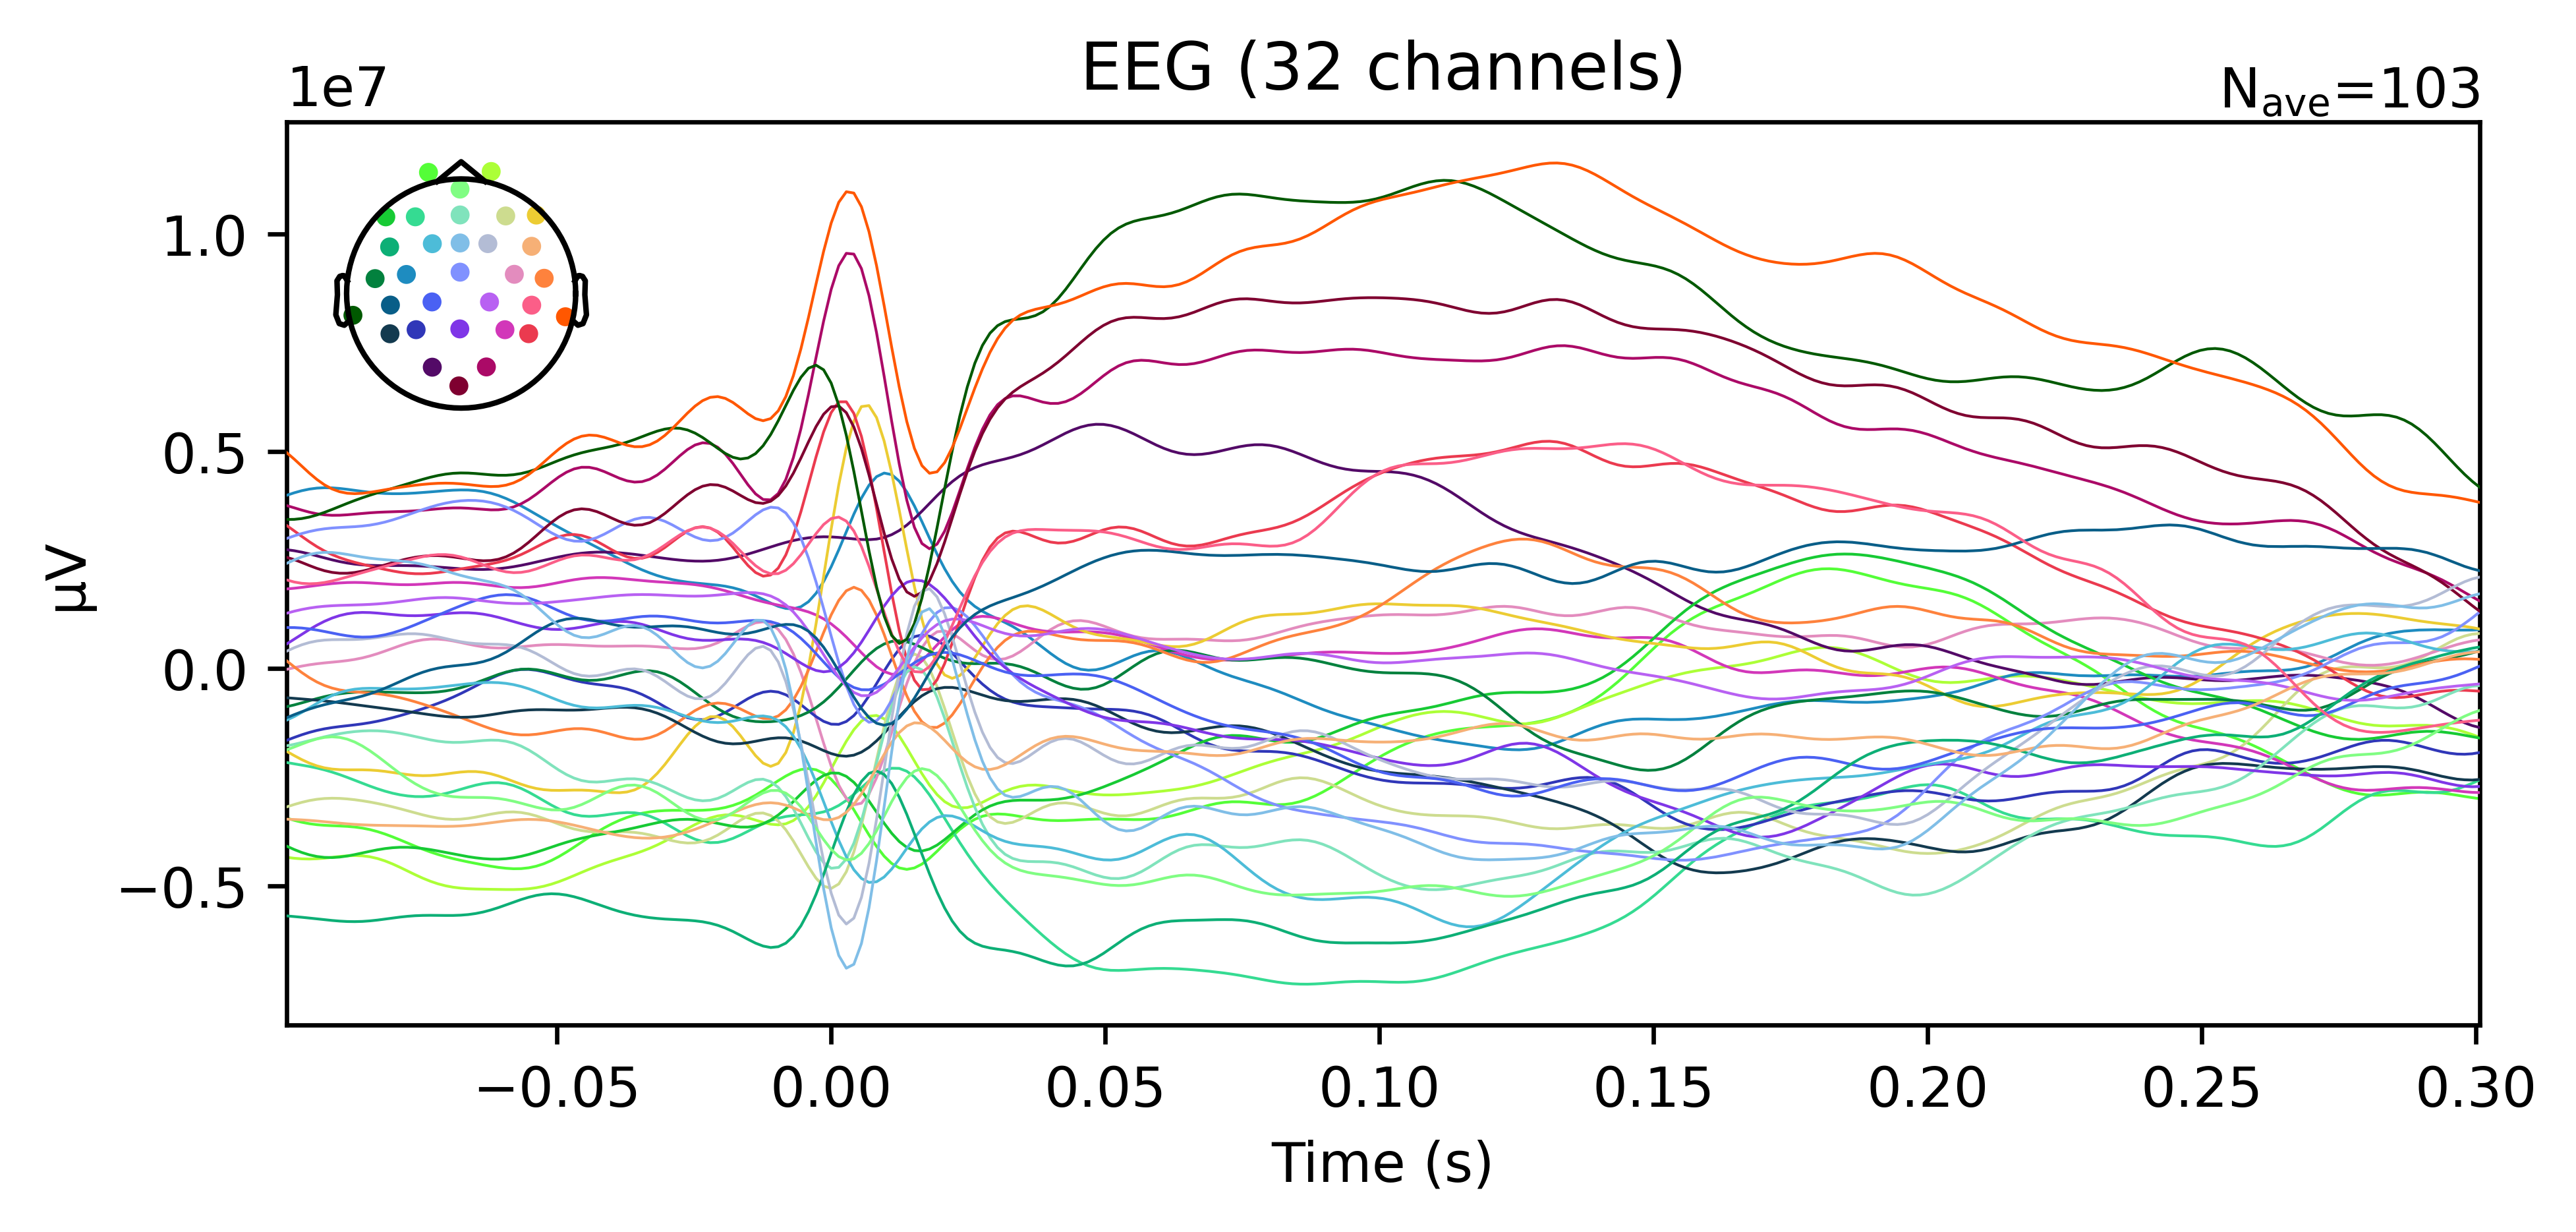

In [6]:
fig = evoked.plot(unit=True, show=True, ylim=None, proj=False, hline=None, scalings=None, titles=None, axes=None, gfp=False,
selectable=False, time_unit='s',  verbose=True);

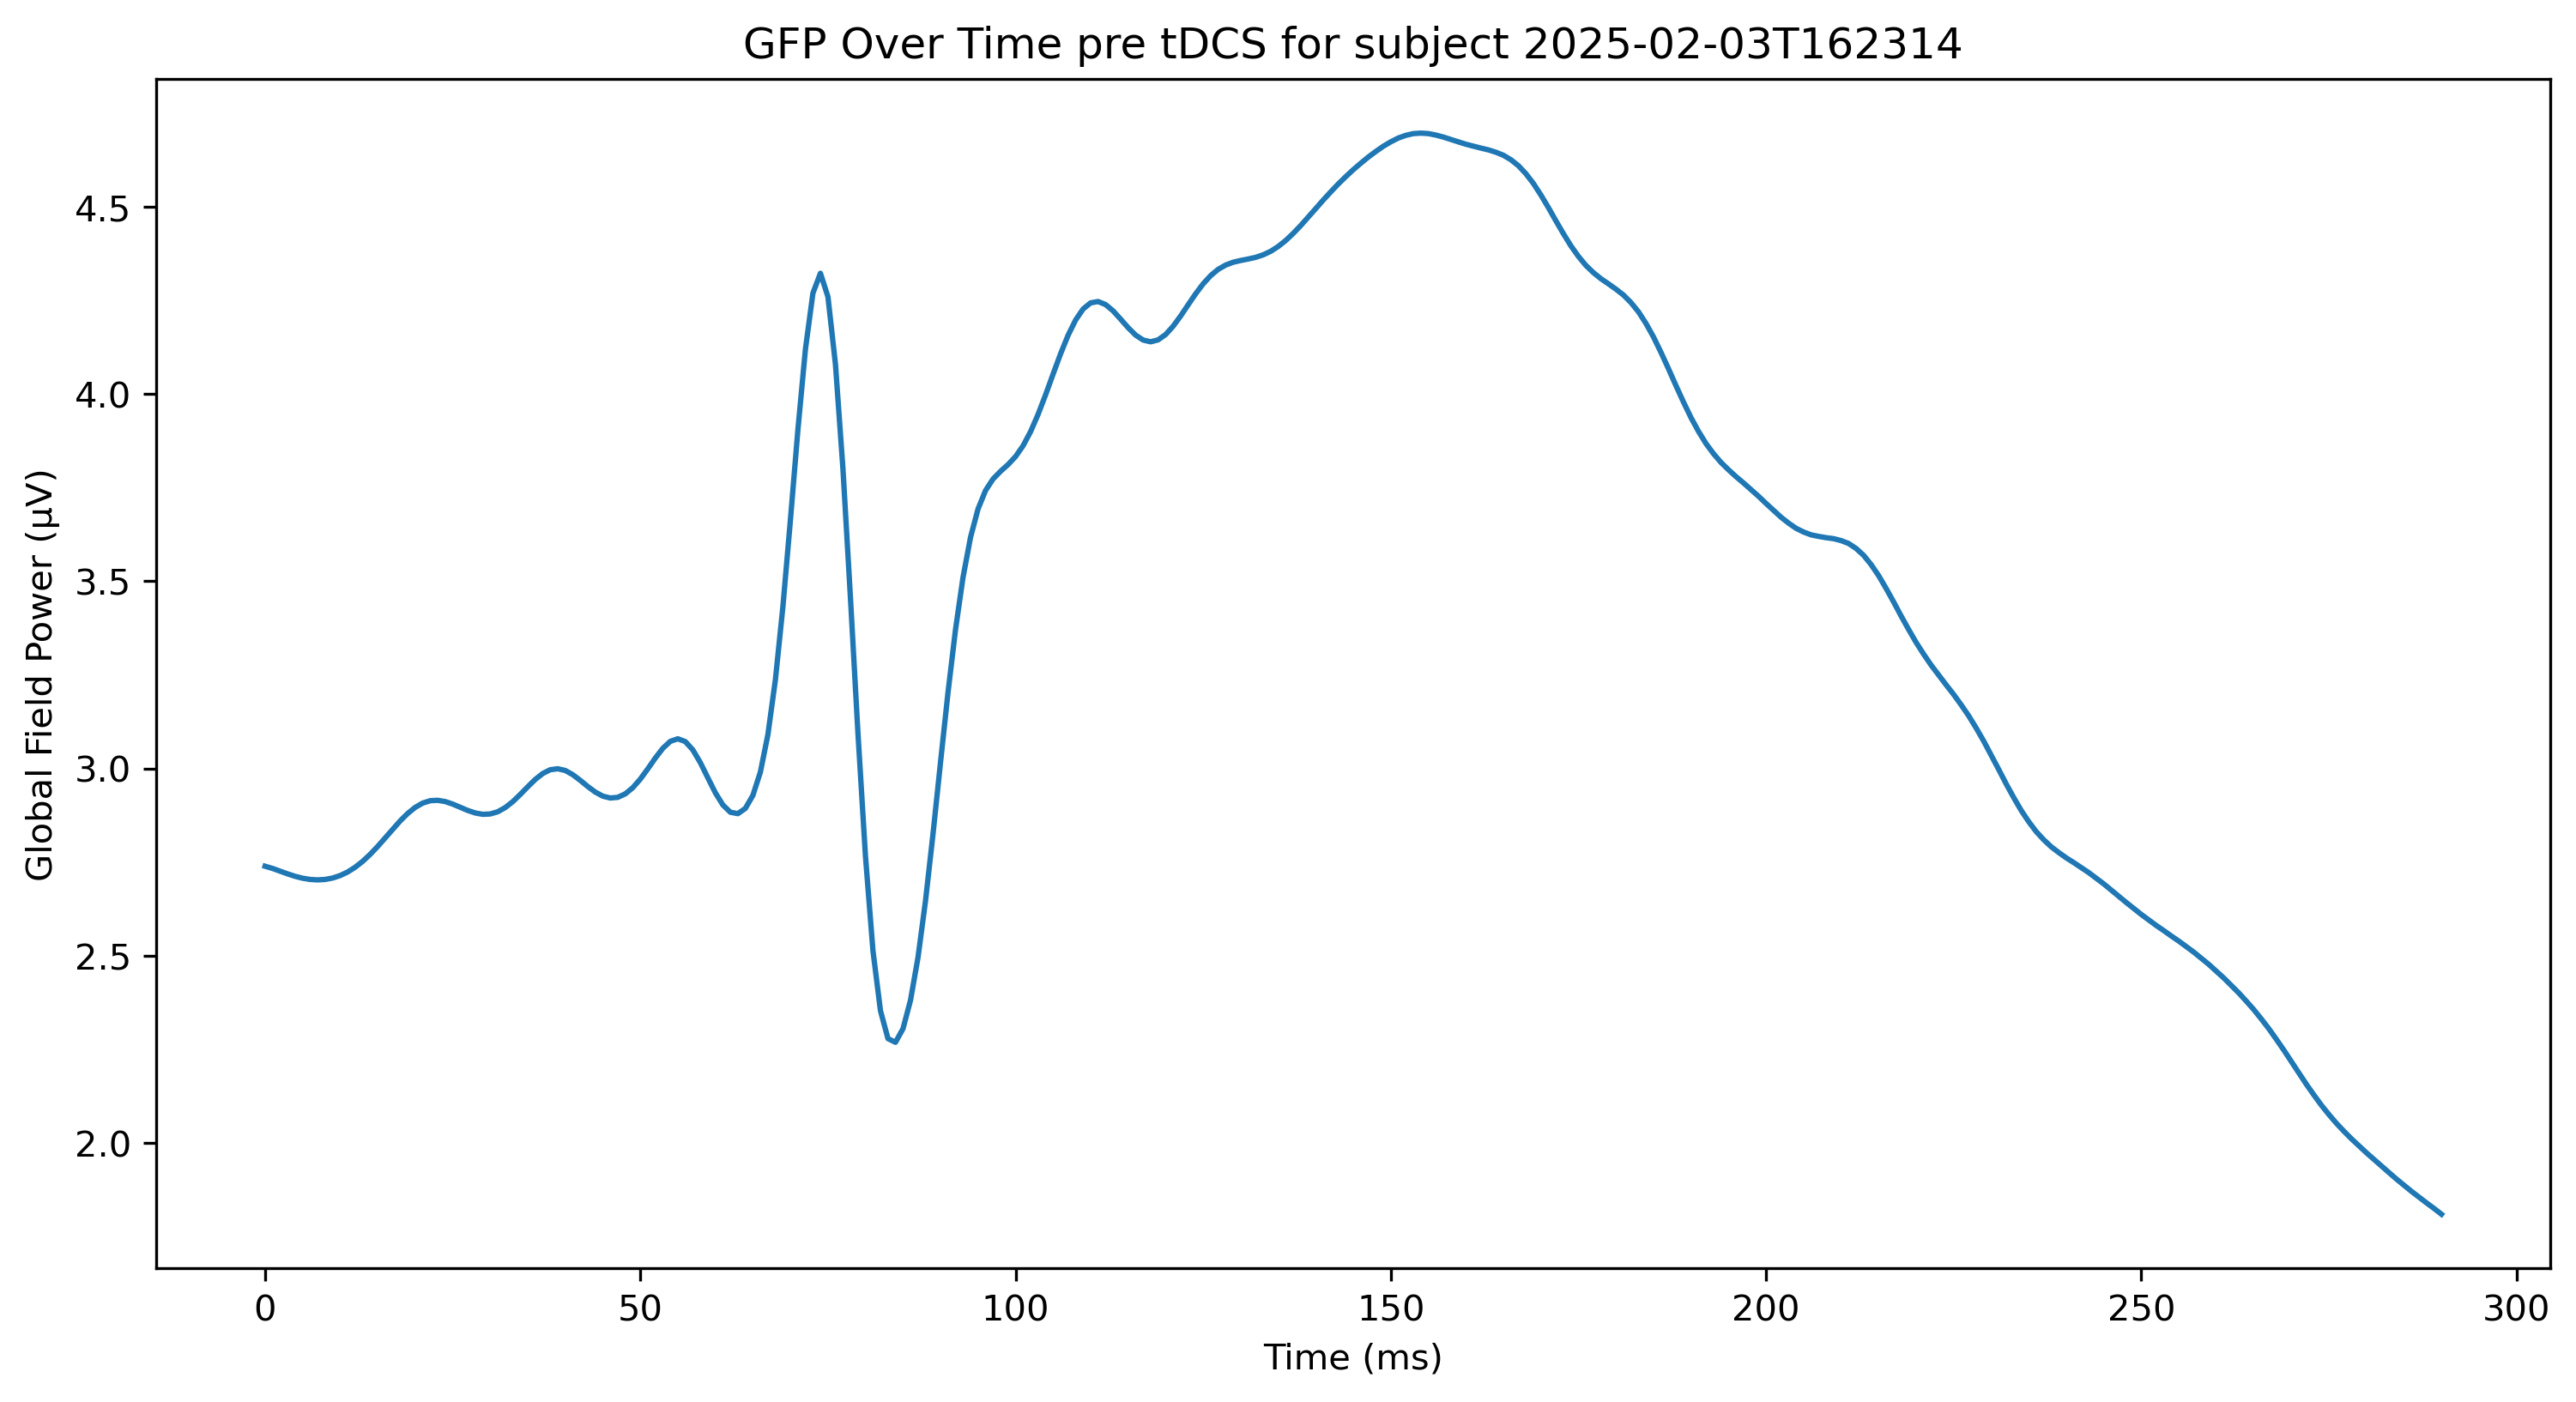

In [5]:
# GFP plot pre
## get data from evoked object channels x times
D_pre = evoked.get_data()

## get times for x-axis
times_pre = evoked.times
## calculate gfp as standard deviations over all channels for each point in time

gfp_pre = D_pre.std(axis=0, ddof=0)

## invert for negative peaks
inverted_gfp_pre = -gfp_pre


# Create the plot
plt.figure(figsize=(12, 6), dpi=300)  # Set figure size and high DPI for quality
plt.plot(gfp_pre)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Global Field Power (µV)')
plt.title(f"GFP Over Time pre tDCS for subject {subject}")

# Save the figure in high resolution
plt.savefig(f"/Users/alexe/Kaggle/tdcs/subject_{subject}_pre_tdcs_gfp.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close(fig)